# 1. Librerías y funciones

> 🚧 La siguiente celda sólo debe ser ejecutada cuando se corra el notebook en google colab, de lo contrario, para correr el cuaderno en local debes tener instaladas las librerías requeridas (ver el readme del directorio notebooks).

In [ ]:
# Sólo para usuarios de colab descomentar la siguiente línea:
# %pip install gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 26.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [3]:
def grafica_2d(puntos, titulo, size=4):
  plt.scatter(puntos[:,0], puntos[:,1], s=size)
  plt.gca().set_aspect('equal')
  plt.grid()
  plt.title(titulo)
  ax = plt.gca()
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.yaxis.tick_left()
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')
  plt.show();

def grafica_3d(puntos):
  puntos = pd.DataFrame(data=puntos, columns=['x', 'y', 'z'])
  df = pd.DataFrame(data = puntos[['z']].to_numpy(), columns=['opacity'])
  fig = px.scatter_3d(puntos, x='x', y='y', z='z', size=np.ones(puntos.shape[0])*0.0001,
                      color=df.opacity, color_discrete_map={val: f'rgba(255, 0, 255, {int(val) / 0.01})' for val in df.opacity})
  fig.update_layout(width=1200, height=700, scene=dict(bgcolor='#e5ecf6'))
  fig.update_scenes(aspectmode='data')
  fig.show();

def info_simplex(simplextree, esqueleto=None, field=2):
  print(f''' num. vertices: {simplextree.num_vertices()}
          \n num. simplices: {simplextree.num_simplices()}
          \n esqueleto ({esqueleto}): ''')
  if esqueleto is not None:
    for sk_value in simplextree.get_skeleton(esqueleto): print(sk_value[0])
  else: print('-')
  simplextree.compute_persistence(homology_coeff_field=field, min_persistence=0, persistence_dim_max=True)
  print(f'Números de Betti en Z_{field}: {simplextree.betti_numbers()}')

# 2. Complejos simpliciales

In [4]:
st = gd.SimplexTree()

In [5]:
st

In [6]:
st.insert([1,2,3])

True

In [7]:
st.num_vertices()

3

In [8]:
st.num_simplices()

7

In [9]:
st.insert([1,2,4])
st.insert([1,3,4])
st.insert([2,3,4])

True

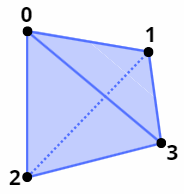

In [10]:
for sk_value in st.get_skeleton(0): print(sk_value[0])

[1]
[2]
[3]
[4]


In [11]:
st.dimension()

2

In [12]:
st.find([1,2,3,4])

False

In [13]:
st.get_star([1])

[([1], 0.0),
 ([1, 2], 0.0),
 ([1, 2, 3], 0.0),
 ([1, 2, 4], 0.0),
 ([1, 3], 0.0),
 ([1, 3, 4], 0.0),
 ([1, 4], 0.0)]

In [14]:
st.compute_persistence(homology_coeff_field=11, persistence_dim_max=True)
st.betti_numbers()

[1, 0, 1]

## Triangulaciones

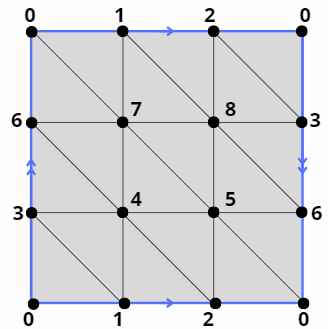

In [15]:
# Botella de Klein
Klein = gd.SimplexTree()

Klein.insert([0,1,7])
Klein.insert([0,6,7])
Klein.insert([1,7,8])
Klein.insert([1,2,8])
Klein.insert([2,3,8])
Klein.insert([0,2,3])

Klein.insert([4,6,7])
Klein.insert([4,5,7])
Klein.insert([5,7,8])
Klein.insert([5,6,8])
Klein.insert([3,6,8])
Klein.insert([3,4,6])

Klein.insert([0,1,3])
Klein.insert([1,3,4])
Klein.insert([1,2,4])
Klein.insert([2,4,5])
Klein.insert([0,2,5])
Klein.insert([0,5,6])

info_simplex( Klein, esqueleto=None, field=3 )

 num. vertices: 9
          
 num. simplices: 54
          
 esqueleto (None): 
-
Números de Betti en Z_3: [1, 1, 0]


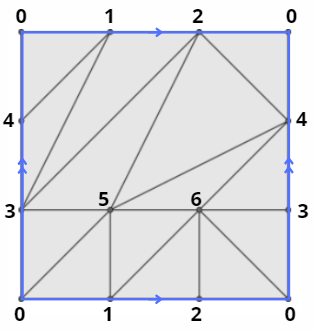

In [16]:
# Toro
Toro = gd.SimplexTree()

Toro.insert([0,1,4])
Toro.insert([1,3,4])
Toro.insert([1,2,3])
Toro.insert([0,2,4])
Toro.insert([2,4,5])
Toro.insert([2,3,5])

Toro.insert([0,3,5])
Toro.insert([0,1,5])
Toro.insert([1,5,6])
Toro.insert([1,2,6])
Toro.insert([0,2,6])
Toro.insert([0,3,6])

Toro.insert([4,5,6])
Toro.insert([3,4,6])

info_simplex( Toro, esqueleto=None, field=3 )

 num. vertices: 7
          
 num. simplices: 42
          
 esqueleto (None): 
-
Números de Betti en Z_3: [1, 2, 1]


# 3. Nubes de puntos

In [17]:
n = 50
a = 0
b = 2 * np.pi

In [18]:
puntos = np.linspace(a, b, n)
puntos

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

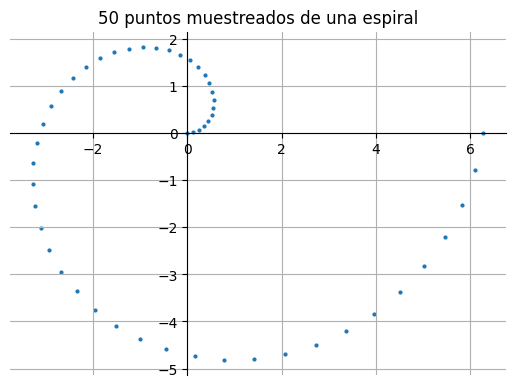

In [19]:
puntos_espiral = np.array([puntos*np.cos(puntos), puntos*np.sin(puntos)])
grafica_2d(puntos_espiral.T, f'{n} puntos muestreados de una espiral')

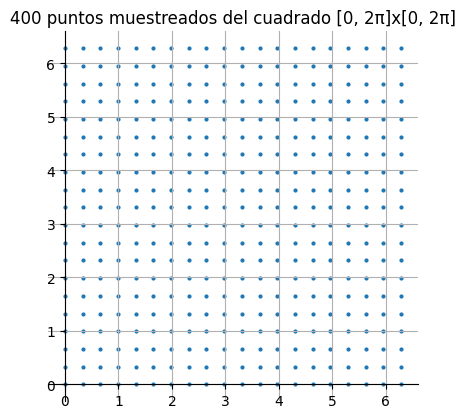

In [20]:
n = 20
phi = np.tile( np.linspace(a, b, n), n)
theta = np.sort(np.tile(np.linspace(a, b, n), n))

grafica_2d(np.stack((phi, theta)).T, f'{n**2} puntos muestreados del cuadrado [{a}, 2π]x[{a}, 2π]')

In [21]:
# Toro (rejilla)
R = 3
r = 1
toro_x = (R + r * np.sin(theta)) * np.cos(phi)
toro_y = (R + r * np.sin(theta)) * np.sin(phi)
toro_z = r * np.cos(theta)
toro = np.array([toro_x, toro_y, toro_z]).T
grafica_3d(toro)

In [22]:
# Toro (random)
phi = np.random.rand(n**2) * 2 * np.pi
theta = np.random.rand(n**2) * 2 * np.pi
R = 3
r = 1
toro_x = (R + r * np.sin(theta)) * np.cos(phi)
toro_y = (R + r * np.sin(theta)) * np.sin(phi)
toro_z = r * np.cos(theta)
toro_random = np.array([toro_x, toro_y, toro_z]).T
grafica_3d(toro_random)

In [23]:
# Toro con ruido gaussiano
phi = np.random.rand(n**2) * 2 * np.pi
theta = np.random.rand(n**2) * 2 * np.pi
R = 3
r = 1
toro_x = (R + r * np.sin(theta)) * np.cos(phi)
toro_y = (R + r * np.sin(theta)) * np.sin(phi)
toro_z = r * np.cos(theta)
toro_ruido = np.array([toro_x, toro_y, toro_z]).T
toro_ruido += np.random.normal(0, 0.2, toro_ruido.shape)
grafica_3d(toro_ruido)

# 4. Filtraciones

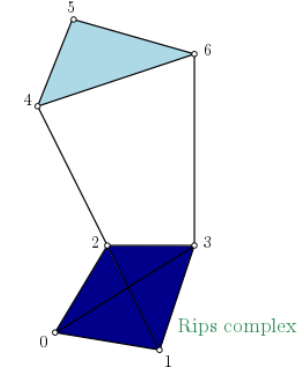

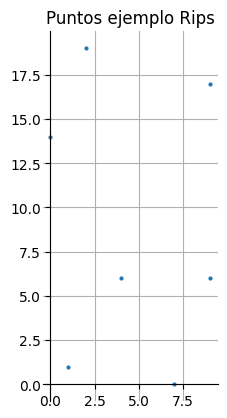

In [24]:
points = np.array([[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]])
grafica_2d(points, 'Puntos ejemplo Rips')

In [25]:
rips_complex = gd.RipsComplex(points=points, max_edge_length=12.0)

In [26]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2) # 🔵🟣🔴 Mostrar con max_dimension = 2 y 3

result_str = f'Rips complex is of dimension {simplex_tree.dimension()}, {simplex_tree.num_simplices()} simplices, {simplex_tree.num_vertices()} vertices.'
print(result_str)

fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Rips complex is of dimension 2, 23 simplices, 7 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[2, 3] -> 5.00
[4, 5] -> 5.39
[0, 2] -> 5.83
[0, 1] -> 6.08
[1, 3] -> 6.32
[1, 2] -> 6.71
[0, 1, 2] -> 6.71
[1, 2, 3] -> 6.71
[5, 6] -> 7.28
[2, 4] -> 8.94
[0, 3] -> 9.43
[0, 1, 3] -> 9.43
[0, 2, 3] -> 9.43
[4, 6] -> 9.49
[4, 5, 6] -> 9.49
[3, 6] -> 11.00


In [27]:
# Alternativa
from scipy.spatial.distance import cdist

points = [[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]]

distance_matrix = cdist(points, points)

cplx = gd.SimplexTree.create_from_array(distance_matrix, max_filtration=12.0)
cplx.expansion(1) # Cambiar por 2 y 3

for filtered_value in cplx.get_filtration():
    print(fmt % tuple(filtered_value))

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[2, 3] -> 5.00
[4, 5] -> 5.39
[0, 2] -> 5.83
[0, 1] -> 6.08
[1, 3] -> 6.32
[1, 2] -> 6.71
[5, 6] -> 7.28
[2, 4] -> 8.94
[0, 3] -> 9.43
[4, 6] -> 9.49
[3, 6] -> 11.00


In [28]:
ejemplo = gd.RipsComplex(
    points = toro,
    max_edge_length = 2
)

Rips_toro = ejemplo.create_simplex_tree(max_dimension = 3)

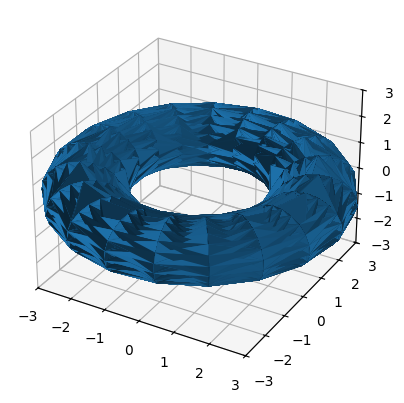

In [29]:
points = toro
triangles = np.array([s[0] for s in Rips_toro.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 2])
# Visualization with matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
l = ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles = triangles)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

plt.show()

In [30]:
ejemplo = gd.RipsComplex(
    points = toro_random,
    max_edge_length = 2 # un poco menos
)

Rips_toro_random = ejemplo.create_simplex_tree(max_dimension = 3)

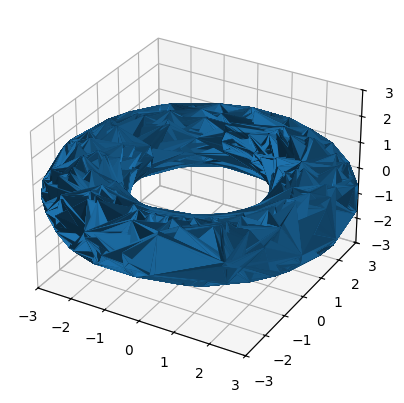

In [31]:
points = toro_random
triangles = np.array([s[0] for s in Rips_toro_random.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 2])
# Visualization with matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
l = ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles = triangles)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

plt.show()

In [32]:
ejemplo = gd.RipsComplex(
    points = toro_ruido,
    max_edge_length = 2 # un poco más
)

Rips_toro_ruido = ejemplo.create_simplex_tree(max_dimension = 3)

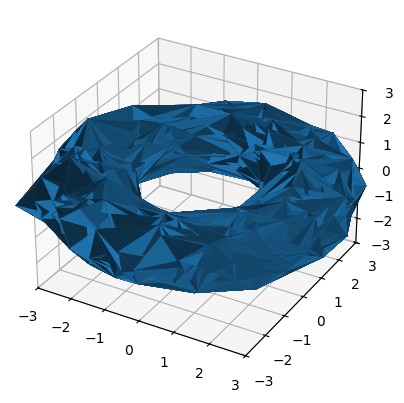

In [33]:
points = toro_ruido
triangles = np.array([s[0] for s in Rips_toro_ruido.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 2])
# Visualization with matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
l = ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles = triangles)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

plt.show()

# 5. Diagramas de persistencia

np.float64(1.4726739951494352)

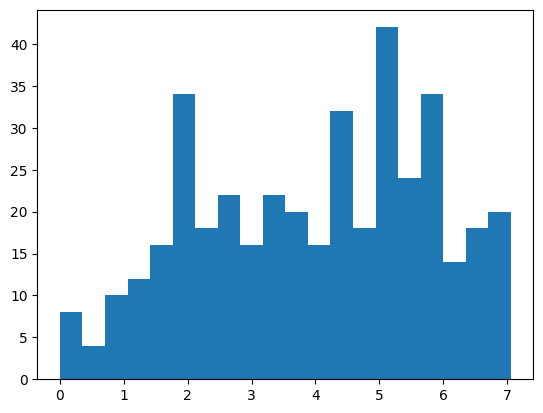

In [34]:
distancias = np.linalg.norm(toro - toro[0, :], axis=1)
plt.hist(distancias, bins = 20);
np.quantile(distancias, 0.1)

/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:129: UserWarning:

usetex mode requires TeX.



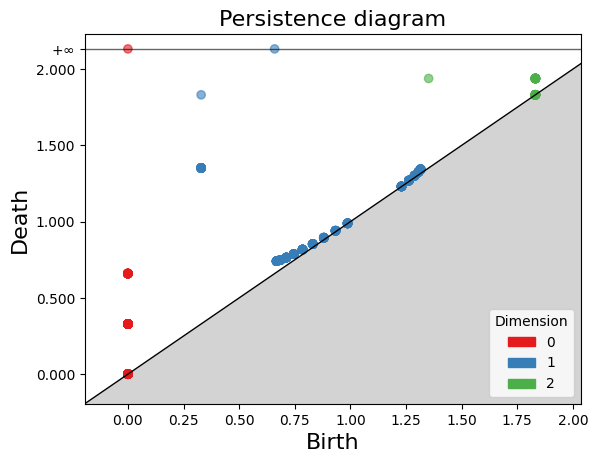

In [35]:
BarCodes_toro = Rips_toro.persistence()

gd.plot_persistence_diagram(BarCodes_toro);

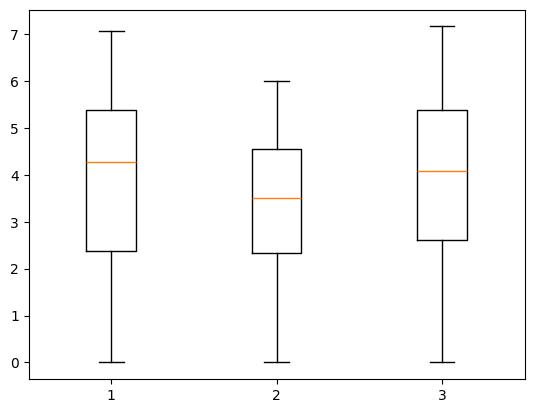

In [36]:
distancias_random = np.linalg.norm(toro_random - toro_random[0, :], axis=1)
distancias_ruido = np.linalg.norm(toro_ruido - toro_ruido[0, :], axis=1)
plt.boxplot( np.stack((distancias, distancias_random, distancias_ruido), axis=1) );

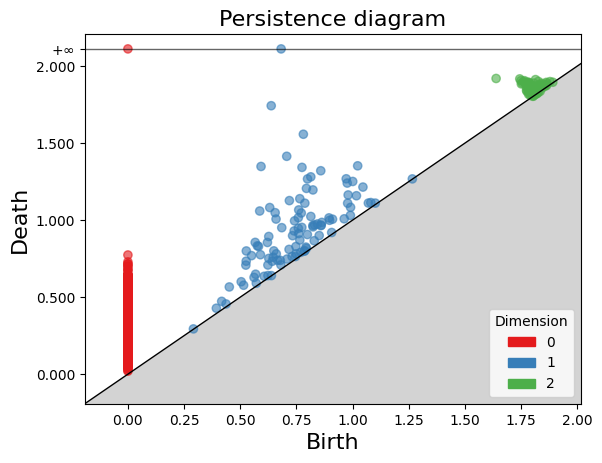

In [37]:
BarCodes_toro_random = Rips_toro_random.persistence()

gd.plot_persistence_diagram(BarCodes_toro_random);

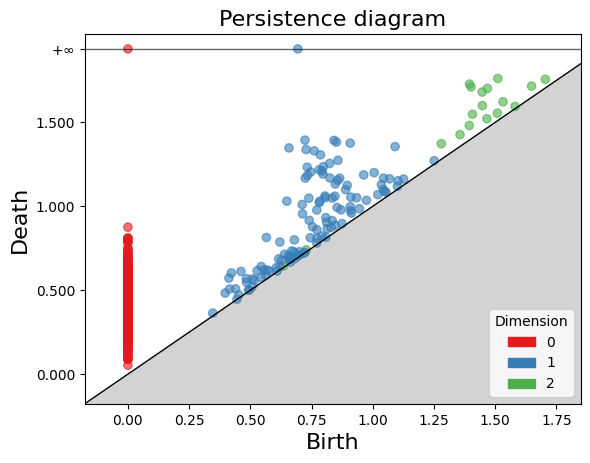

In [38]:
BarCodes_toro_ruido = Rips_toro_ruido.persistence()

gd.plot_persistence_diagram(BarCodes_toro_ruido);

In [39]:
len(BarCodes_toro)

730

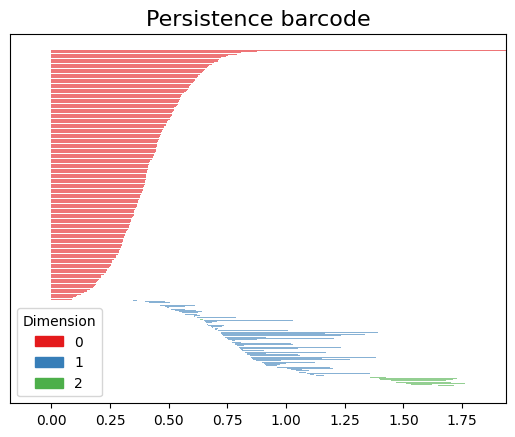

In [40]:
gd.plot_persistence_barcode(BarCodes_toro_ruido, max_intervals=600);

# 6. Distancias

In [41]:
Rips_toro

In [42]:
toro0 = Rips_toro.persistence_intervals_in_dimension(0)
toro_random0 = Rips_toro_random.persistence_intervals_in_dimension(0)
toro_ruido0 = Rips_toro_ruido.persistence_intervals_in_dimension(0)

toro1 = Rips_toro.persistence_intervals_in_dimension(1)
toro_random1 = Rips_toro_random.persistence_intervals_in_dimension(1)
toro_ruido1 = Rips_toro_ruido.persistence_intervals_in_dimension(1)

toro2 = Rips_toro.persistence_intervals_in_dimension(2)
toro_random2 = Rips_toro_random.persistence_intervals_in_dimension(2)
toro_ruido2 = Rips_toro_ruido.persistence_intervals_in_dimension(2)

In [43]:
gd.bottleneck_distance(toro0, toro_ruido0)

0.34669440357907133

In [44]:
gd.bottleneck_distance(toro_random1, toro_ruido1)

0.34815292197186154